In [1]:
from keras.datasets import cifar10
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
class_labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}

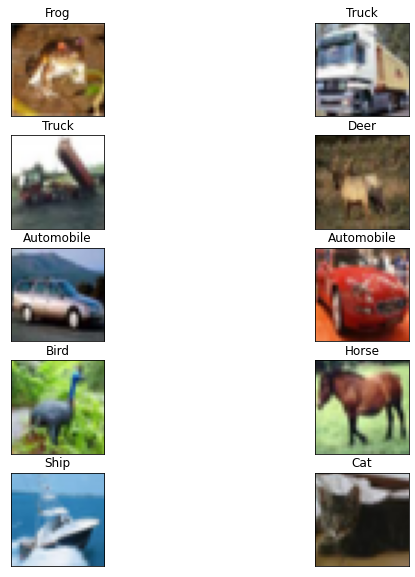

In [4]:
plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_train[i])
    plt.title(class_labels[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
X_train = X_train/255
X_test = X_test / 255

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'),
])

model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [7]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 147s 93ms/step - loss: 1.6276 - accuracy: 0.4184
Epoch 2/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.2436 - accuracy: 0.5740
Epoch 3/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.0975 - accuracy: 0.6317
Epoch 4/10
1563/1563 [==============================] - 126s 81ms/step - loss: 1.0143 - accuracy: 0.6625
Epoch 5/10
1563/1563 [==============================] - 126s 80ms/step - loss: 0.9713 - accuracy: 0.6838
Epoch 6/10
1563/1563 [==============================] - 126s 80ms/step - loss: 0.9551 - accuracy: 0.6890
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9527 - accuracy: 0.6930
Epoch 8/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9821 - accuracy: 0.6898
Epoch 9/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9954 - accuracy: 0.6887
Epoch 10/10
1563/1563 [==============================] 

In [8]:
prob = model.predict(X_test)
pred = np.argmax(prob, axis = 1)

In [9]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [10]:
print(accuracy_score(y_test, pred))

0.6849


In [11]:
print(log_loss(y_test, prob))

1.0567898572098664


In [12]:
confusion_matrix(y_test, pred)

array([[819,  11,  90,  17,  16,   2,   4,  15,   9,  17],
       [ 48, 832,  20,  26,   3,   2,   5,   7,   9,  48],
       [ 59,   2, 709,  65,  74,  29,  26,  31,   1,   4],
       [ 30,   4, 120, 586,  72, 107,  31,  41,   0,   9],
       [ 36,   0, 138,  92, 635,   8,  22,  67,   2,   0],
       [ 17,   1, 112, 239,  48, 507,  12,  61,   1,   2],
       [ 10,   2, 114, 120,  69,  16, 663,   5,   0,   1],
       [ 11,   2,  61,  47,  42,  32,   2, 801,   1,   1],
       [271,  34,  34,  31,   9,   4,   7,  12, 572,  26],
       [ 79,  90,  28,  34,   2,   8,   6,  23,   5, 725]])

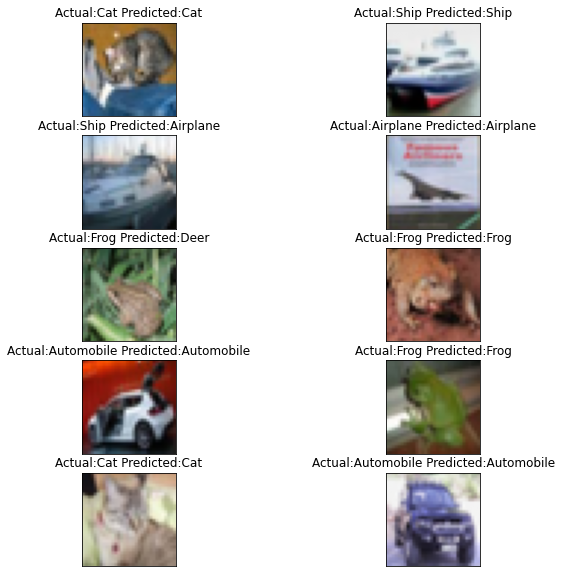

In [16]:
plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[i])
    string = "Actual:" + class_labels[y_test[i][0]] + " Predicted:" + class_labels[pred[i]]
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()